In [29]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import h

plt.rcParams["figure.figsize"] = (20,15)

## Lab 5: Higgs Classification - EDA

### Setup

In [2]:
infile = open('higgs_100000_pt_250_500.pkl', 'rb')
infile_two = open('qcd_100000_pt_250_500.pkl', 'rb')
new_dict = pickle.load(infile)
new_dict_2 = pickle.load(infile_two)

In [3]:
higgs_data = pd.DataFrame(new_dict)
bkgd_data = pd.DataFrame(new_dict_2)

In [4]:
higgs_data.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118


In [5]:
bkgd_data.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201


### Introduction

Before we start this lab, let us take a moment to understand our data and where it comes from. 

We are working with a simulated dataset that recreates the high-level data that one would collect at the Large Hadron Collider when they are performing an experiment looking for the Higgs Boson particle. The Higgs Boson particle is an elementary particle in the standard model of physics. This particle is what is associated to the Higgs Field, the field that supposedly provides particles with mass. The Higgs Boson particle is considered the visible manifestation of the field. However, even though the particle has been theorized to exist for almost half a century, it was not until 2012 when the ATLAS and CMS experiments found a new particle with mass centered around 125 GeV that was consistent with the properties of the Higgs Boson particle. However, this is only the start and there would have to be several more studies performed before we can confirm whether it is the Higgs Boson particle or not.

Now let us talk a bit about what the experiment itself is so that we can learn about the data. In the experiment, rays of protons(gamma rays) collide at the center of a detector and they create debris which is recorded by the detector. In our case, we are working under the condition where √ s = 13 TeV. We are interested in recording data about the debris since the debris contains new particles. If there was to be a Higgs Boson particle it would decay into bottom quarks. It is the hadronization of these quarks that creates the jets that we are studying. Data about these jets can be collected using caloriemeters and we can then use the data to reconstruct the large-radius jets that would show a potential Higgs Boson. However, the smaller jets also make a lot of bottom quarks that end up contaminating the background making it hard to spot a 5σ observation for the particle.

### Columns of our datasets

We will be working with two datasets, the higgs_data which represents the jets from Higgs Boson decay and bkgd_data which represents all the other particles that are created. Both these datasets contain information about 14 high-level features of the jets and they are:

1. 'pt' - the 'transverse momentum' of the jet in GeV. Our data contains jets with pt between 250 and 500 GeV. Given other conditions are met, a higher value of this could suggest a Higgs Boson particle.

2. 'eta' - the 'pseudorapidity' which is a measure of the angle of a particle relative to the beam's axis. Centered around 0 which means that the particle is parallel to the axis, and has a min and max of -3 and 3 which shows that it is perpendicular.

3. 'phi' - the 'azimuth' which is a measure of the angle between the reference direction and the line between the detector and the collision.

4. 'mass' - the mass of the jet in GeV.

5. 'ee2' - the 2-point energy correlation function ratio.

6. 'ee3' - the 3-point energy correlation function ration.

7. 'd2' - 3 to 2 point energy correaltion function ratio.

8. 'angularity' - a measure of the orientation between planes

9. 't1' - the 'subjettiness' or 'jet shape', describes the internal features of a jet

10. 't2' - the 'subjettiness' or 'jet shape', describes the internal features of a jet

11. 't3' - the 'subjettiness' or 'jet shape', describes the internal features of a jet

12. 't21' - the 'N-subjettiness' observable which is used to identify bosons.

13. 't32' - the 'N-subjettiness' observable which is used to differentiate between the background and three pronged particles.

14. 'KtDeltaR' - a parameter used in jet finding algorithms

Let us have a look at how the data in our datasets is distributed

In [6]:
higgs_data.describe()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,447.386623,-0.000899,0.002112,114.892387,0.125630,0.002704,1.966660,0.004289,0.901415,0.309755,0.225898,0.348189,0.755682,0.526579
std,44.771106,0.899305,1.813868,25.351070,0.043319,0.001993,2.500585,0.004289,0.217625,0.192411,0.142562,0.199348,0.128628,0.206267
min,250.076799,-3.202213,-3.141587,8.971221,0.006938,0.000002,0.275143,0.000002,0.491827,0.051114,0.038887,0.034160,0.090195,0.011027
25%,430.570091,-0.644074,-1.562480,122.351865,0.109582,0.001568,0.781870,0.001296,0.756085,0.162126,0.130284,0.191479,0.687105,0.474505
50%,464.956021,0.000693,0.005000,125.289912,0.136062,0.002311,1.125611,0.002951,0.857385,0.244256,0.177881,0.293399,0.785419,0.539176
75%,479.833881,0.646856,1.577208,126.329140,0.149558,0.003464,1.820329,0.005684,0.985300,0.408165,0.265786,0.464920,0.850923,0.640279
max,494.205477,3.264195,3.141444,142.439607,0.318725,0.030043,33.722824,0.060482,4.204353,2.446424,1.024776,0.983046,0.981718,1.078074


In [7]:
bkgd_data.describe()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,445.708383,-0.002447,-0.002548,97.738041,0.089894,3.524497e-03,5.209383,4.941442e-03,0.913344,0.590302,0.476382,0.649212,0.805052,0.320726
std,34.824328,1.223938,1.813190,43.492923,0.065269,6.034649e-03,4.285187,5.576030e-03,0.155764,0.192134,0.171263,0.194495,0.104633,0.264540
min,250.125101,-3.240244,-3.141537,9.292817,0.002392,6.406594e-07,0.281344,5.803207e-07,0.392616,0.044932,0.026275,0.035544,0.077015,0.004970
25%,425.580984,-0.943242,-1.577321,67.195971,0.042505,5.076771e-04,2.175551,6.780458e-04,0.820499,0.453505,0.344726,0.519197,0.753088,0.094502
50%,448.447635,-0.006611,0.008342,88.126862,0.070525,1.366397e-03,3.851124,2.884777e-03,0.902288,0.608477,0.484189,0.680241,0.824019,0.244613
75%,471.773128,0.940265,1.567191,118.543683,0.118559,3.796792e-03,6.873730,7.505375e-03,0.977596,0.744121,0.611007,0.803194,0.880149,0.495818
max,499.999840,3.192603,3.141572,321.397993,0.495944,1.162739e-01,101.156561,5.360182e-02,3.941721,1.780207,1.111759,0.991104,0.988284,1.270750


While we can't tell much by looking at these short summaries, it gives us a broad overview of the ranges of data that we will be looking at.

### Finding features with discriminatory power

Knowing that our background is quite contaminated it is important that we focus on features that can provide us with a clear picture that is not drowned out by the background. In order to do so, we will first plot comparative histograms for all the features in both datasets.

Text(0.5, 0, 'Transverse Momentum (GeV)')

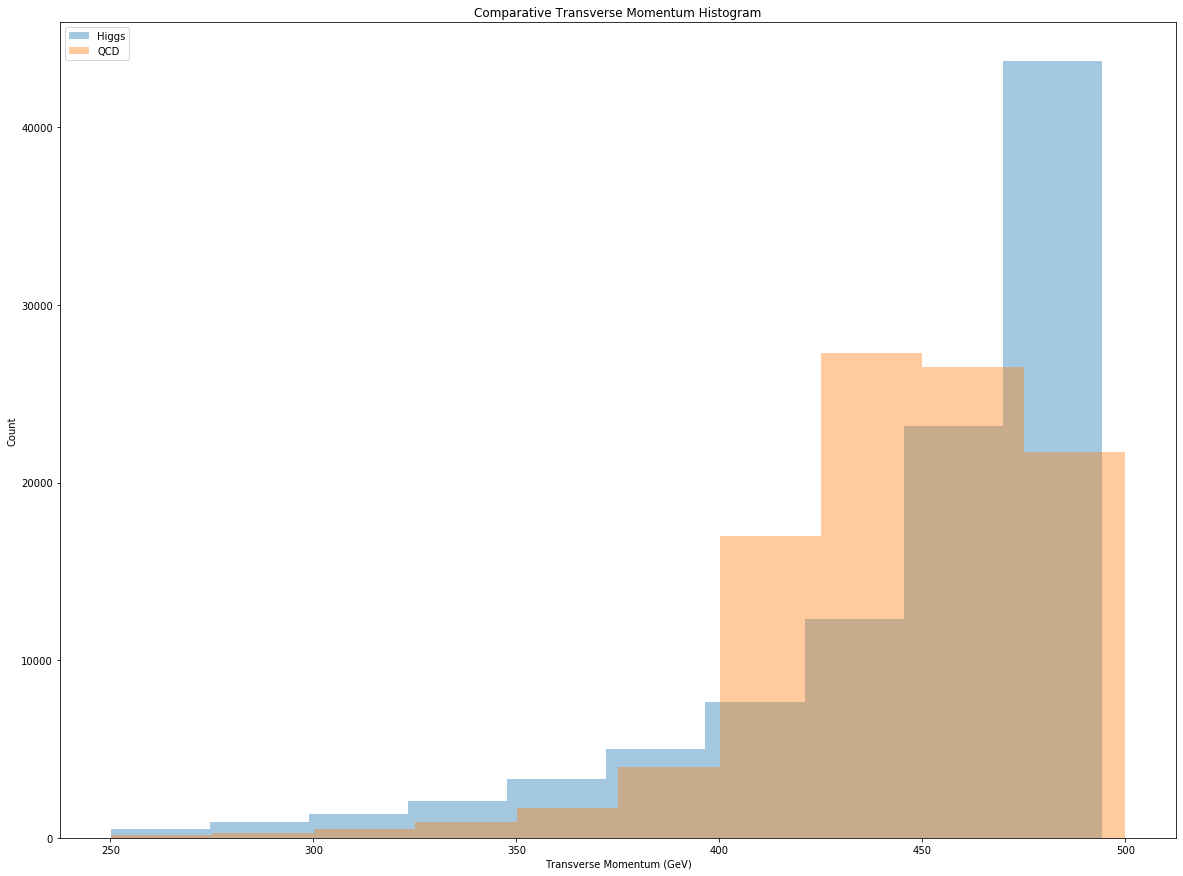

In [8]:
plt.hist(higgs_data['pt'], alpha = 0.4, label = 'Higgs')
plt.hist(bkgd_data['pt'], alpha = 0.4, label = 'QCD')
plt.legend(loc = 2)
plt.title('Comparative Transverse Momentum Histogram')
plt.ylabel('Count')
plt.xlabel('Transverse Momentum (GeV)')

The background and the jet data seem to have a similar shape, but the jet data sharply increases around 500 GeV

Text(0.5, 0, 'Azimuth angle')

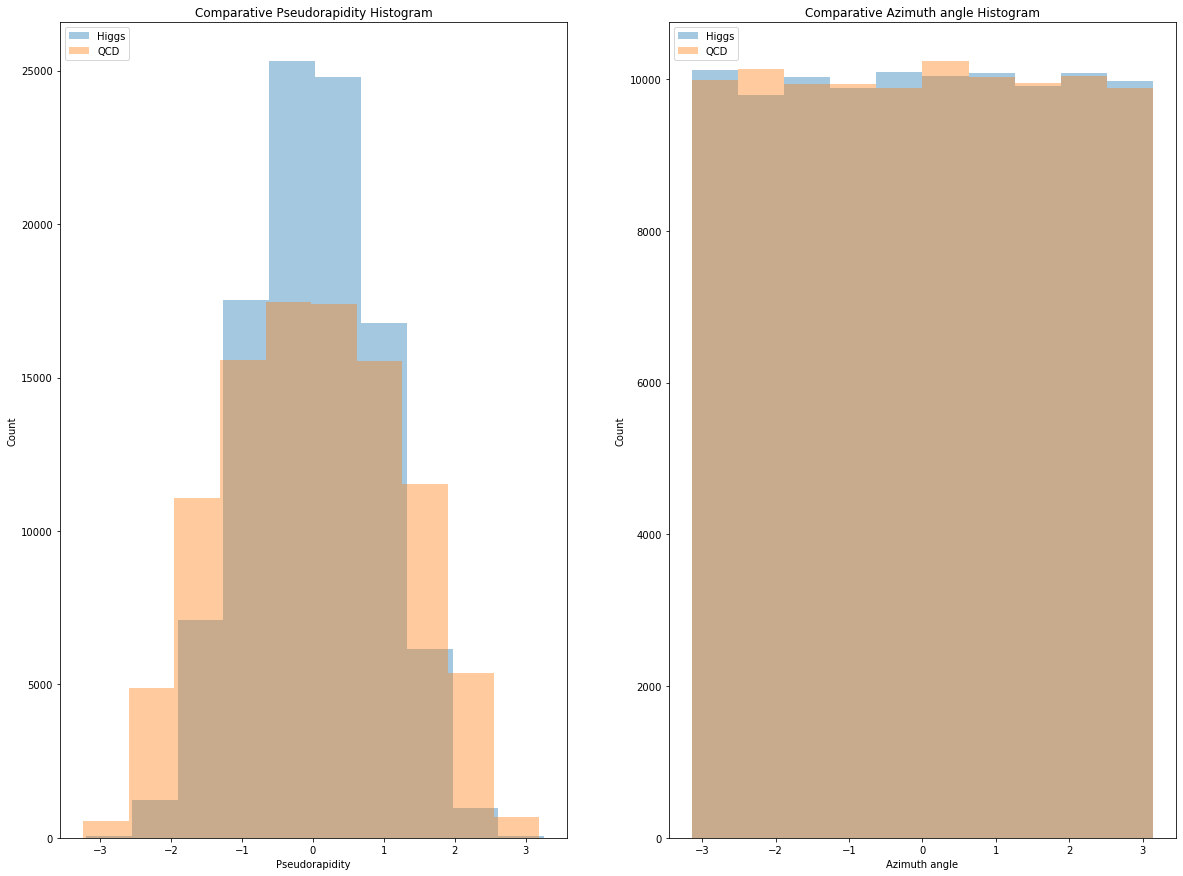

In [9]:
fig, axs1 = plt.subplots(1,2)

axs1[0].hist(higgs_data['eta'], alpha = 0.4, label = 'Higgs')
axs1[0].hist(bkgd_data['eta'], alpha = 0.4, label = 'QCD')
axs1[0].legend(loc = 2)
axs1[0].title.set_text('Comparative Pseudorapidity Histogram')
axs1[0].set_ylabel('Count')
axs1[0].set_xlabel('Pseudorapidity')

axs1[1].hist(higgs_data['phi'], alpha = 0.4, label = 'Higgs')
axs1[1].hist(bkgd_data['phi'], alpha = 0.4, label = 'QCD')
axs1[1].legend(loc = 2)
axs1[1].title.set_text('Comparative Azimuth angle Histogram')
axs1[1].set_ylabel('Count')
axs1[1].set_xlabel('Azimuth angle')

For the pseudorapidity, there is considerable overlap between the two and both seem similar to a gaussian distribution. While for the azimuth, there is little to no difference between them.

Text(0.5, 0, 'Mass (GeV)')

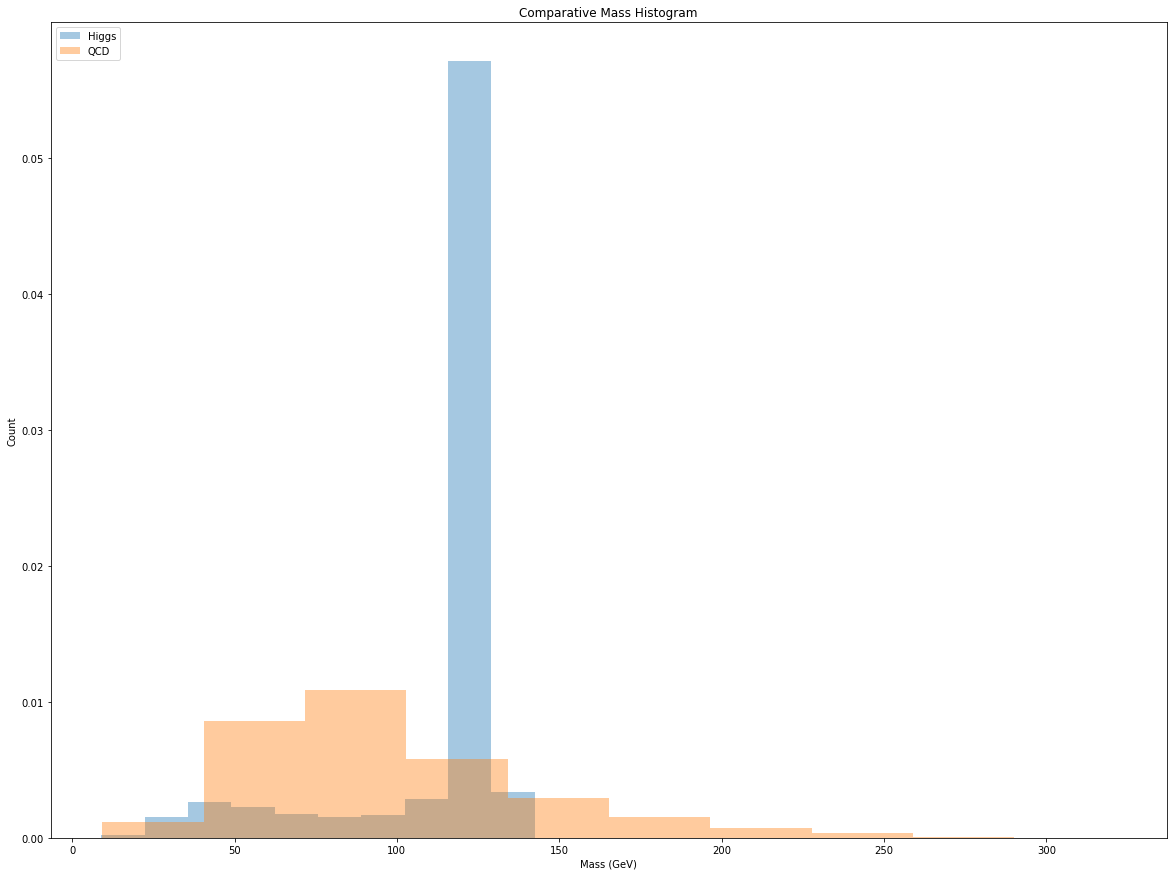

In [10]:
plt.hist(higgs_data['mass'], alpha = 0.4, label = 'Higgs', density = True)
plt.hist(bkgd_data['mass'], alpha = 0.4, label = 'QCD', density = True)
plt.legend(loc = 2)
plt.title('Comparative Mass Histogram')
plt.ylabel('Count')
plt.xlabel('Mass (GeV)')

The Higgs data spikes around 125 GeV which is consistent with the reading at which the new particle was found. There also seems to be some signals with less eV that are present that resemble the background distribution and might be due to it.

Text(0.5, 0, '3 to 2 point ECF ratio')

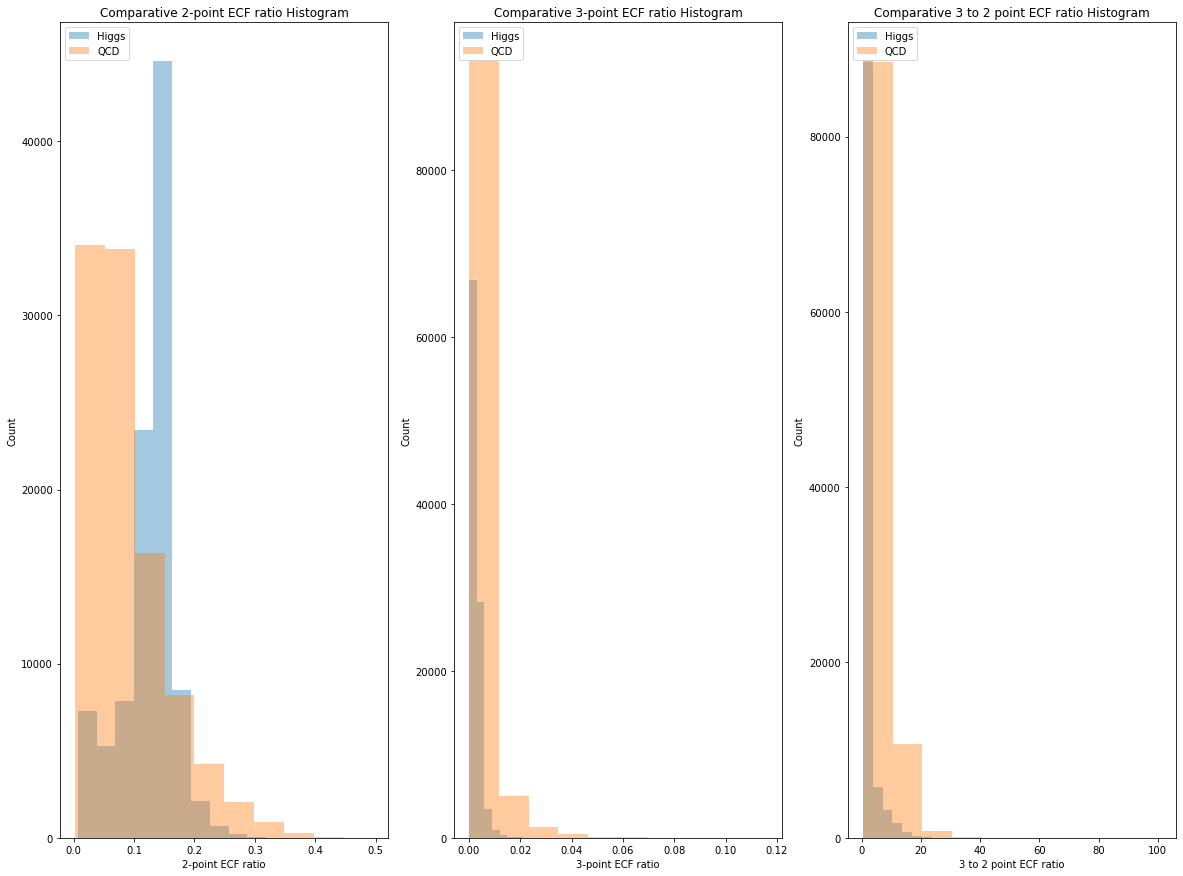

In [11]:
fig, axs2 = plt.subplots(1,3)

axs2[0].hist(higgs_data['ee2'], alpha = 0.4, label = 'Higgs')
axs2[0].hist(bkgd_data['ee2'], alpha = 0.4, label = 'QCD')
axs2[0].legend(loc = 2)
axs2[0].title.set_text('Comparative 2-point ECF ratio Histogram')
axs2[0].set_ylabel('Count')
axs2[0].set_xlabel('2-point ECF ratio')

axs2[1].hist(higgs_data['ee3'], alpha = 0.4, label = 'Higgs')
axs2[1].hist(bkgd_data['ee3'], alpha = 0.4, label = 'QCD')
axs2[1].legend(loc = 2)
axs2[1].title.set_text('Comparative 3-point ECF ratio Histogram')
axs2[1].set_ylabel('Count')
axs2[1].set_xlabel('3-point ECF ratio')

axs2[2].hist(higgs_data['d2'], alpha = 0.4, label = 'Higgs')
axs2[2].hist(bkgd_data['d2'], alpha = 0.4, label = 'QCD')
axs2[2].legend(loc = 2)
axs2[2].title.set_text('Comparative 3 to 2 point ECF ratio Histogram')
axs2[2].set_ylabel('Count')
axs2[2].set_xlabel('3 to 2 point ECF ratio')

Again there is significant overlap in all the the features between both datasets; however, the 2-point ECF ratio for the boson decay data does differ from the background since it has a seperate peak and seems to be increasing rather than decreasing like the background.

Text(0.5, 0, 'Angularity')

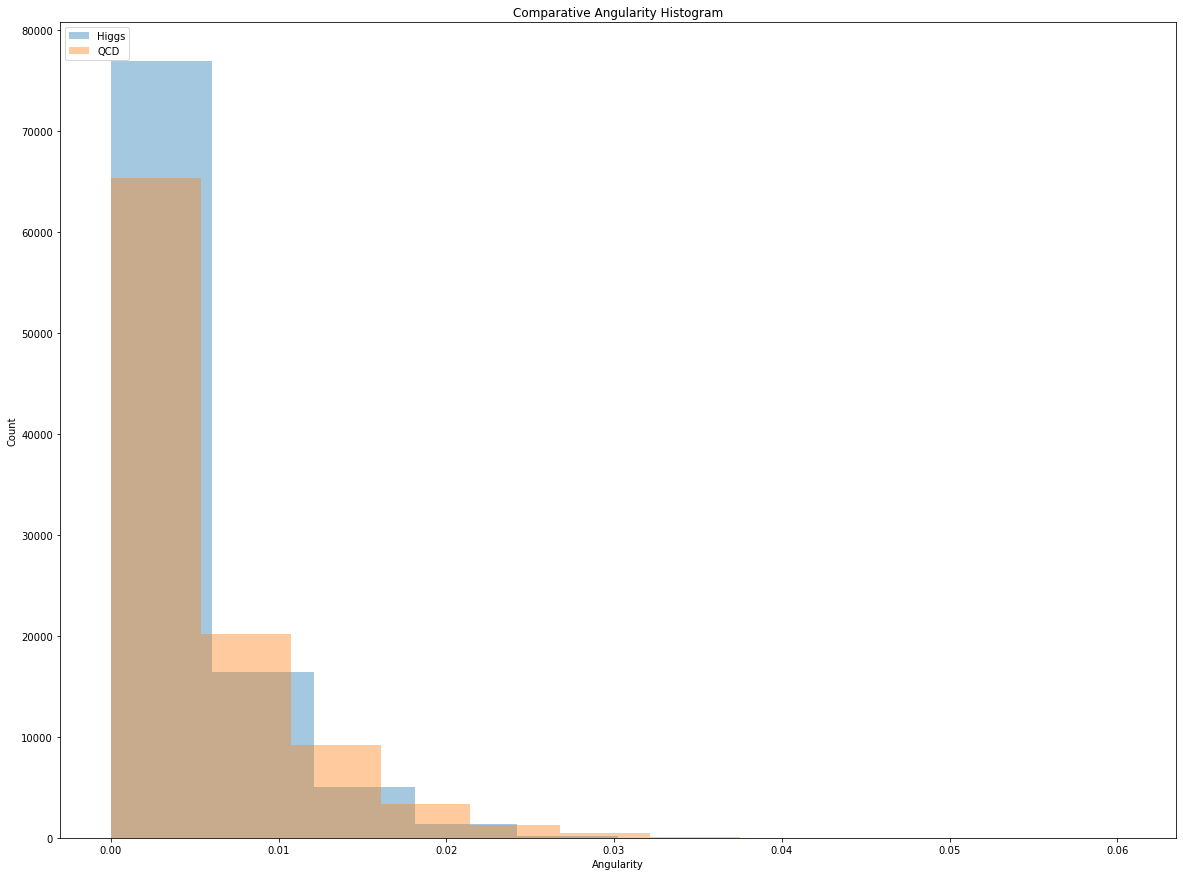

In [12]:
plt.hist(higgs_data['angularity'], alpha = 0.4, label = 'Higgs')
plt.hist(bkgd_data['angularity'], alpha = 0.4, label = 'QCD')
plt.legend(loc = 2)
plt.title('Comparative Angularity Histogram')
plt.ylabel('Count')
plt.xlabel('Angularity')

Once again there is substantial overlap between the two, but the data from the higgs boson decay dataset has a higher peak.

Text(0.5, 0.98, 'Comparative Subjettiness histograms')

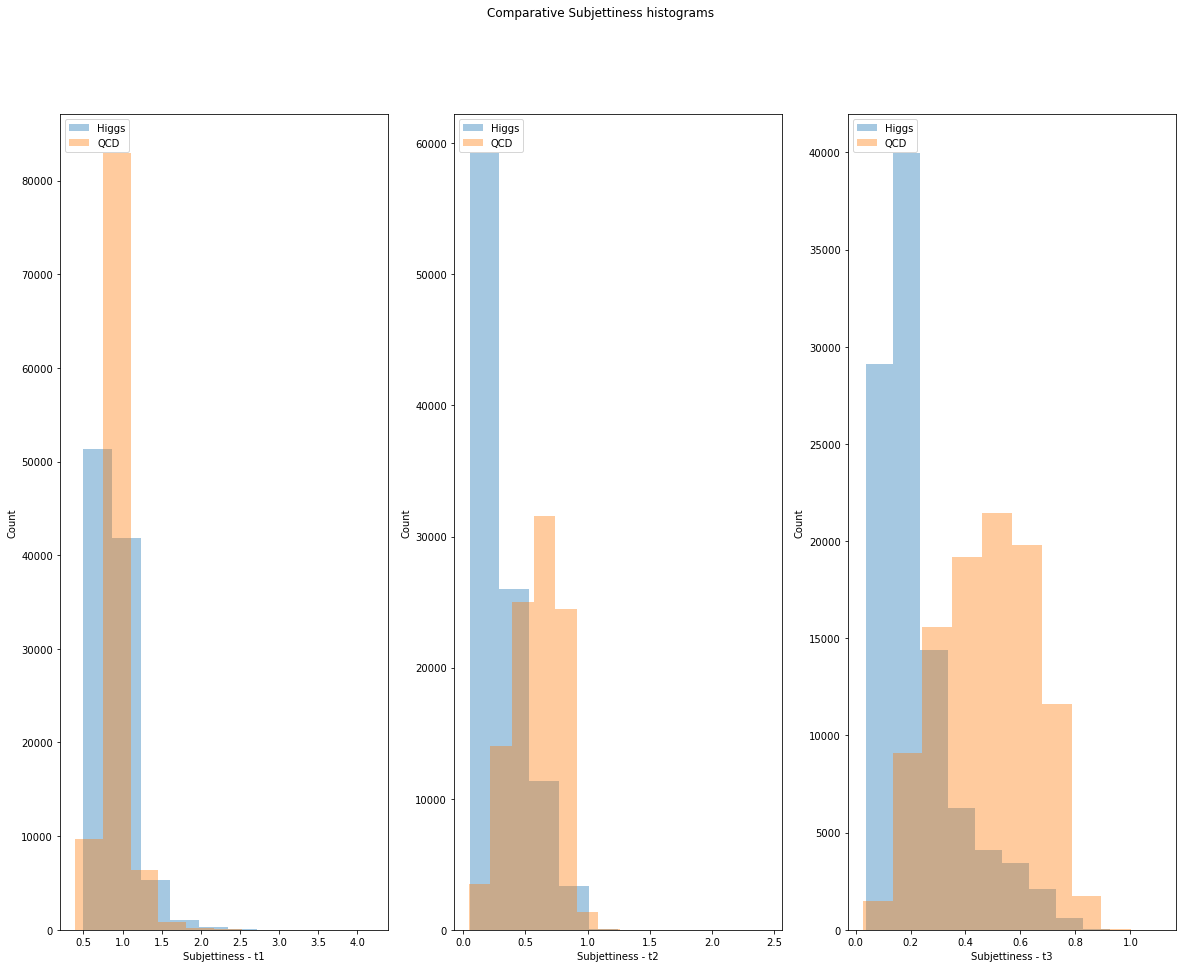

In [13]:
fig, axs3 = plt.subplots(1,3)

axs3[0].hist(higgs_data['t1'], alpha = 0.4, label = 'Higgs')
axs3[0].hist(bkgd_data['t1'], alpha = 0.4, label = 'QCD')
axs3[0].legend(loc = 2)

axs3[1].hist(higgs_data['t2'], alpha = 0.4, label = 'Higgs')
axs3[1].hist(bkgd_data['t2'], alpha = 0.4, label = 'QCD')
axs3[1].legend(loc = 2)

axs3[2].hist(higgs_data['t3'], alpha = 0.4, label = 'Higgs')
axs3[2].hist(bkgd_data['t3'], alpha = 0.4, label = 'QCD')
axs3[2].legend(loc = 2)

axs3[0].set_xlabel('Subjettiness - t1')
axs3[1].set_xlabel('Subjettiness - t2')
axs3[2].set_xlabel('Subjettiness - t3')

axs3[0].set_ylabel('Count')
axs3[1].set_ylabel('Count')
axs3[2].set_ylabel('Count')

plt.suptitle('Comparative Subjettiness histograms')

Again there is some overlap, but this time the decay data has a more distinct shape and does not blend into the background which should be expected if the decay data does come from the higgs boson particle.

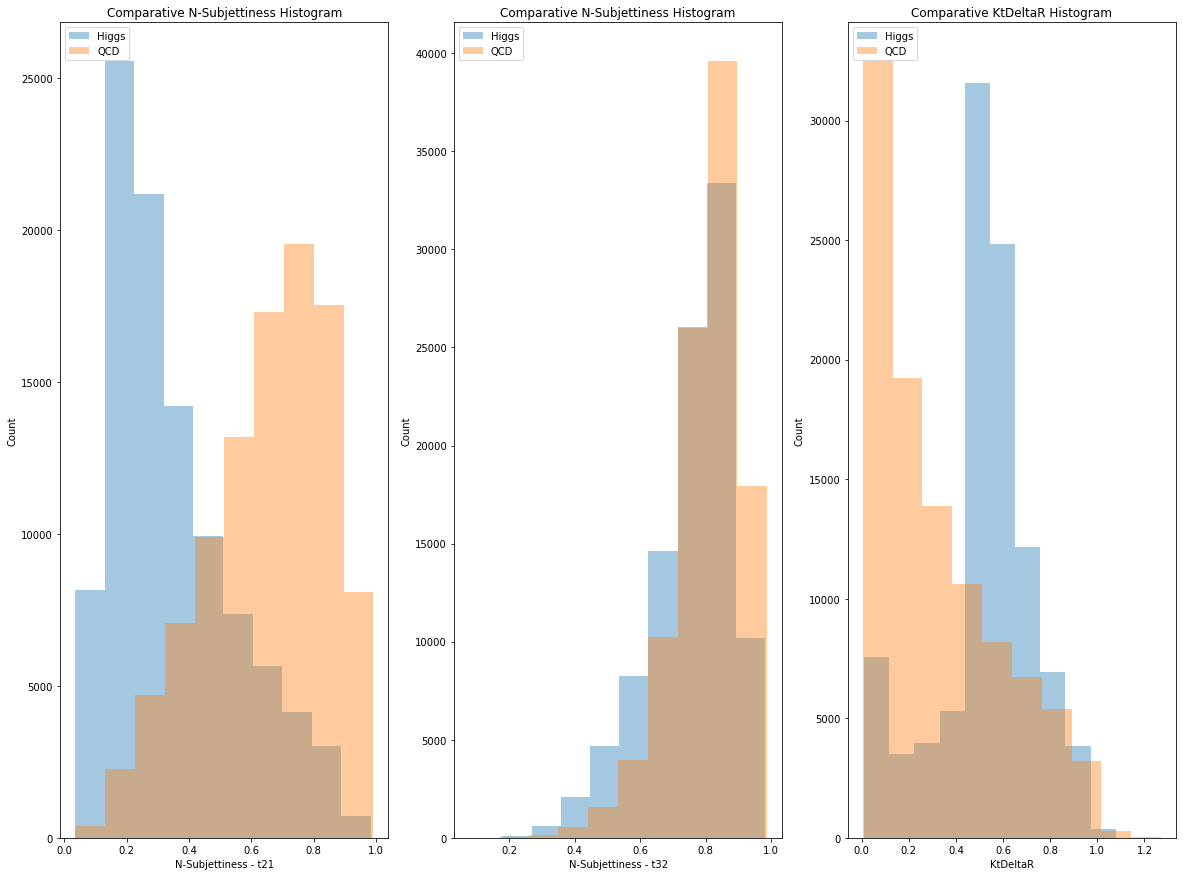

In [14]:
fig, axs4 = plt.subplots(1,3)

axs4[0].hist(higgs_data['t21'], alpha = 0.4, label = 'Higgs')
axs4[0].hist(bkgd_data['t21'], alpha = 0.4, label = 'QCD')
axs4[0].legend(loc = 2)

axs4[1].hist(higgs_data['t32'], alpha = 0.4, label = 'Higgs')
axs4[1].hist(bkgd_data['t32'], alpha = 0.4, label = 'QCD')
axs4[1].legend(loc = 2)

axs4[2].hist(higgs_data['KtDeltaR'], alpha = 0.4, label = 'Higgs')
axs4[2].hist(bkgd_data['KtDeltaR'], alpha = 0.4, label = 'QCD')
axs4[2].legend(loc = 2)

axs4[0].set_xlabel('N-Subjettiness - t21')
axs4[1].set_xlabel('N-Subjettiness - t32')
axs4[2].set_xlabel('KtDeltaR')

axs4[0].set_ylabel('Count')
axs4[1].set_ylabel('Count')
axs4[2].set_ylabel('Count')

axs4[0].title.set_text('Comparative N-Subjettiness Histogram')
axs4[1].title.set_text('Comparative N-Subjettiness Histogram')
axs4[2].title.set_text('Comparative KtDeltaR Histogram')

Here we also see some overlap, but the t21 N-Subjettiness is quite distinct and can be useful when it comes to looking for the boson particle. 

Overall, we can see that most plots have a substantial amount of overlap which is to be expected given the severity of contamination from the background. However, all the features other than 'phi', the azimuth angle, produce a distinct shape that differes enough from the other to be provide discriminatory power to it.

### Looking for correlation

Next, we look for correlation between the features that we are working with.

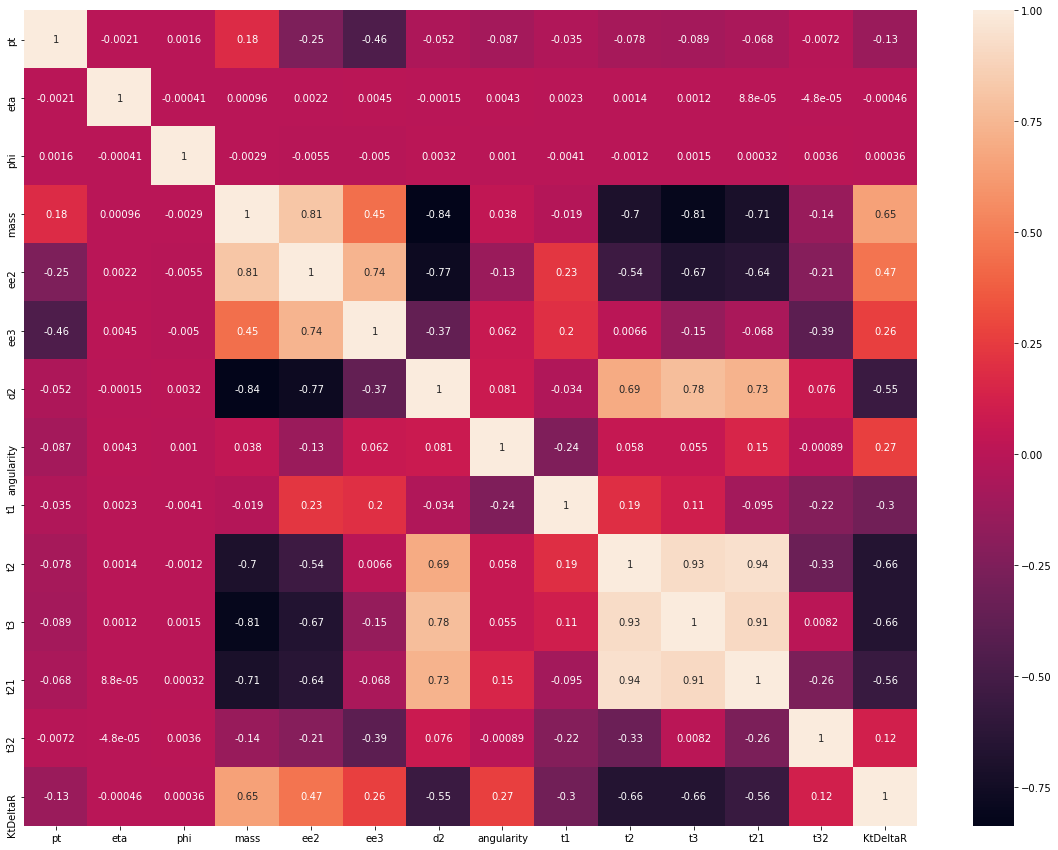

In [15]:
corr_matrix = higgs_data.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

By looking at this correlation matrix, we can see that there is a strong correlation between:
1. mass and ee2, d2, t2, t3, t21, and KtDeltaR. 

2. ee2 and t2, t3, t21, d2, and ee3.

3. d2 and t21, t3, t2

4. t2 and KtDeltaR, t21, and t3

5. t3 and KtDeltaR, and t21

*Repetitions are not mentioned

Looking above, we can see that most of the features have little to no correlation between each other; however, the features above have a strong correlation to the ones mentioned. The features that show strong correlation are somewhat similar in that the measures of subjettiness have a strong correlation with each other and the mass with the subjettiness and the ecf ratios. The second one would make sense since the mass plays a big part in the energy possesed by the jets and the properties of the jets. 

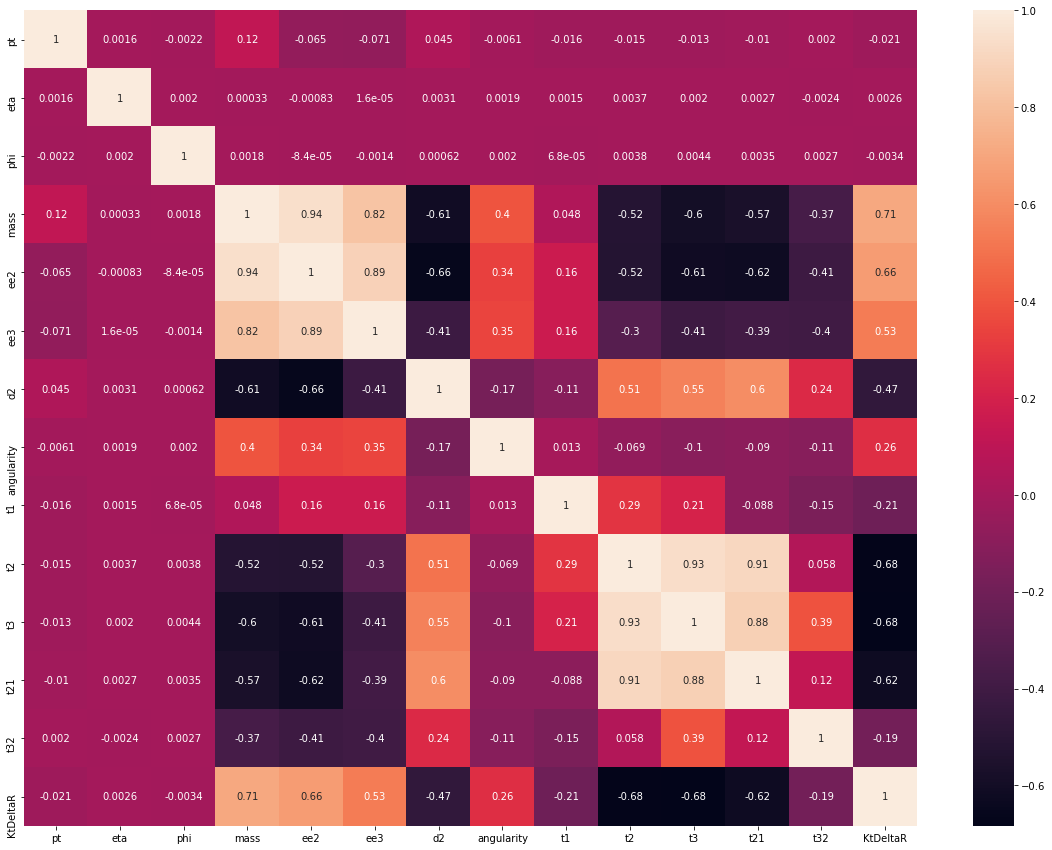

In [16]:
corr_matrix2 = bkgd_data.corr()
sns.heatmap(corr_matrix2, annot = True)
plt.show()

The background also follows a similar pattern to the jet data.

### Normalizing and finding discovery sensitivity

Now we must consider that even though we have 100k data points in each dataset, the observations that we are looking are a lot rarer. From our higgs data we should be looking at around a 100 data points that are of relevance and from the background around 20,000 points. Hence we first need to normalize our data to ensure that we are working on the right scale.

In [23]:
normalized_higgs = np.histogram(higgs_data['mass'], weights = 100 * np.ones(len(higgs_data['mass'])) / len(higgs_data['mass']))
normalied_qcd = np.histogram(bkgd_data['mass'], weights= 20000 * np.ones(len(bkgd_data['mass'])) / len(bkgd_data['mass']))

We have now normalized the data, now we can move on and try to find the discovery sensitivity of finding an observation that is relevant from the data. In order to do so, we search the background for finding a particle whose mass is consistent with that of a higgs boson particle; 125 GeV. In order to do this, we assume that the background follows a Poisson distribution since we are looking for rare events over a period of time.

In [73]:
prob = 1 - stats.poisson(bkgd_data['mass'].mean()).cdf(125)
sigma = stats.norm.ppf(1 - prob)
print('The tentative discovery sensitivity is ' + str(sigma))

The tentative discovery sensitivity is 2.70499414329355


### Future Improvements

In order to further optimize our discovery sensitivity, we can look over all the possible values of mass for the higgs boson particle instead of a specific one. THis would entail looking over 125.18 ± 0.16 GeV. Furthermore, we can introduce other variables with determinatory power such as the transverse momentum (pT), or the subjettiness in order to further minimize the region and possibilities of finding a higgs boson particle.